In [ ]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=32a7acec7bb2e391f37819d8fc17165fb32ac4c55165855a7508fdbce96c2515
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from PIL import Image

①　画像ファイルを画像オブジェクトとして読み込む。


②　画像オブジェクトに対し、カラーの操作やサイズの変更を行う。


③　画像オブジェクトを NumPy 配列に変換する。


④　階調や白と黒の逆転を行う。（黒＝１なのか、白＝1なのか）


⑤　NumPy 配列の形状を変更する。


⑥　加工済みの NumPy 配列(テンソル)になる。

画像を数値化する

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x7F659029BC70>


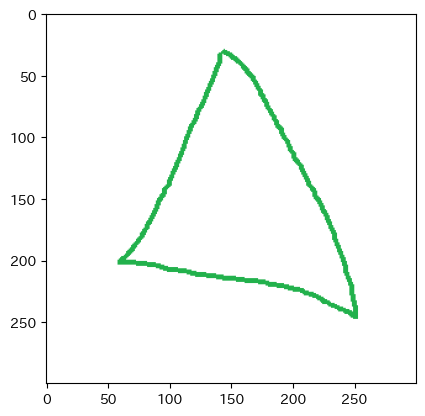

<PIL.Image.Image image mode=L size=300x300 at 0x7F658F27B790>


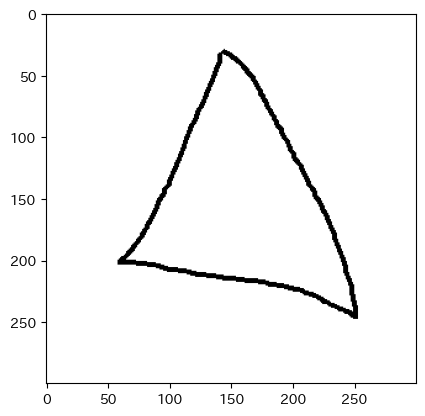

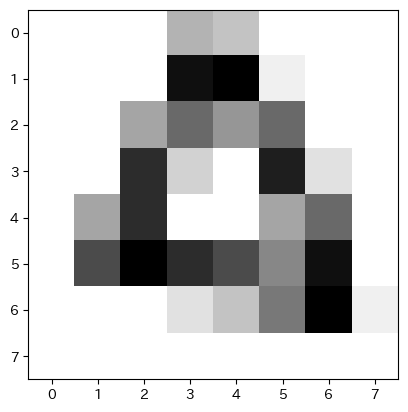

In [ ]:
# ① 画像ファイルを読み込む。
img_orig = Image.open("rec_org.png")
print(img_orig)
plt.imshow(img_orig, alpha=1.0) # alpha は透過度
plt.show()

# ② 8bitグレースケールモードに変換する。
img_c1 = Image.open("rec_org.png").convert("L")
print(img_c1)
plt.imshow(img_c1, cmap="gray")
plt.show()

# ② 大きさを 8×8 にする。
img_c2 = img_c1.resize((8,8))
plt.imshow(img_c2, cmap="gray")
plt.show()

③　画像オブジェクトを NumPy 配列に変換する。

		書式　　np.asarray(画像オブジェクト, dtype = float)
④　16階調にしたり、白と黒の逆転を行う。（黒＝１なのか、白＝1なのか）

⑤　NumPy 配列の形状を 配列名.flatten() でフラットに変更する。

In [ ]:
# ③ 画像オブジェクトを NumPy 配列に変換する。
img_arr1 = np.asarray(img_c2, dtype=float)
print(img_arr1)
print()

# ④ 256階調の値を白黒逆転させ 16 階調にする。
img_arr2 = 16 - np.floor(17 * img_arr1/256)
print(img_arr2)
print()

# ⑤ NumPy配列の形状をフラットに変更する。
img_arr3 = img_arr2.flatten()
print(img_arr3)

[[255. 255. 255. 250. 251. 255. 255. 255.]
 [255. 255. 255. 239. 238. 254. 255. 255.]
 [255. 255. 249. 245. 248. 245. 255. 255.]
 [255. 255. 241. 252. 255. 240. 253. 255.]
 [255. 249. 241. 255. 255. 249. 245. 255.]
 [255. 243. 238. 241. 243. 247. 239. 255.]
 [255. 255. 255. 253. 251. 246. 238. 254.]
 [255. 255. 255. 255. 255. 255. 255. 255.]]

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-10-e48125ad4357>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img2 = img_orig.resize((8,8), Image.ANTIALIAS)


[[[232. 247. 236.]
  [198. 234. 209.]
  [175. 226. 190.]
  [167. 223. 183.]
  [170. 224. 186.]
  [161. 221. 179.]
  [189. 231. 202.]
  [255. 255. 255.]]

 [[151. 217. 170.]
  [185. 230. 198.]
  [211. 239. 219.]
  [227. 245. 232.]
  [232. 247. 236.]
  [230. 246. 235.]
  [180. 228. 194.]
  [170. 224. 186.]]

 [[202. 236. 212.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [165. 223. 182.]]

 [[166. 223. 183.]
  [254. 255. 254.]
  [252. 254. 252.]
  [254. 255. 254.]
  [252. 254. 253.]
  [255. 254. 255.]
  [255. 255. 255.]
  [202. 236. 212.]]

 [[165. 223. 182.]
  [239. 249. 242.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [246. 252. 248.]
  [190. 232. 202.]
  [159. 220. 177.]]

 [[220. 242. 227.]
  [173. 226. 189.]
  [255. 255. 255.]
  [243. 251. 245.]
  [195. 233. 206.]
  [154. 219. 173.]
  [196. 234. 207.]
  [254. 255. 254.]]

 [[255. 255. 255.]
  [205. 237. 214.]
  [190. 231. 202.]
  [179. 228. 193.]


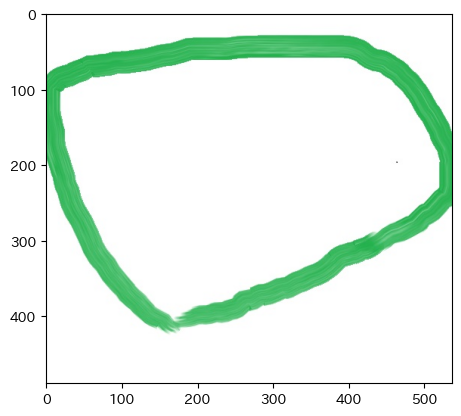

In [ ]:
import PIL

img_orig = PIL.Image.open('sample.jpg')
plt.imshow(img_orig)

img2 = img_orig.resize((8,8), Image.ANTIALIAS)
img_arr = np.asarray(img2, dtype=float)
print(img_arr)

カラー画像は、それぞれ R, G, B の階層に分かれて３層構造になっているのです。つまり、８×８の行列が３枚あるわけです。

数値化すると、これは２次元の行列が３次元的に重なり、複数の階層構造を為すものなので、行列の概念を拡張したものと言えます。こういうものを一般的には　テンソル　と言います。

#画像を数値化(全行程)

In [ ]:
from PIL import Image

# ① 画像ファイルを読み込み、② 8bitグレースケールモードに変換する。
img_c1 = Image.open("rec_org.png").convert("L")
print(img_c1)
plt.imshow(img_c1, cmap="gray")
plt.show()

# ② 大きさを 8×8 にする。
img_c2 = img_c1.resize((8,8))
plt.imshow(img_c2, cmap="gray")
plt.show()

# ③ 画像オブジェクトを NumPy 配列に変換する。
img_arr1 = np.asarray(img_c2, dtype=float)
print(img_arr1)
print()

# ④ 256階調の値を白黒逆転させ 16 階調にする。
img_arr2 = 16 - np.floor(17 * img_arr1/256)
print(img_arr2)
print()

# ⑤ NumPy配列の形状をフラットに変更する。
img_arr3 = img_arr2.flatten()
print(img_arr3)

これを関数化する

In [ ]:
# ファイル名 or ファイルパスを指定した画像を NumPy配列 にして返す関数を定義

def img2array(file_path):
    img_c1 = Image.open(file_path).convert("L")
    #plt.imshow(img_c1, cmap="gray")
    #plt.show()
    img_c2 = img_c1.resize((8,8),Image.LANCZOS)
    #plt.imshow(img_c2, cmap="gray")
    #plt.show()
    img_arr1 = np.asarray(img_c2, dtype=float)
    #print(img_arr1)
    img_arr2 = 16 - np.floor(17 * img_arr1/256)
    img_c3 = Image.fromarray(np.uint8(img_arr2))
    #plt.imshow(img_c3, cmap="gray")
    #plt.show()
    img_arr3 = img_arr2.flatten()
    print(img_arr3.shape)
    return img_arr3.reshape(1,-1)


print(img2array("sam01.png"))

(64,)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 2. 0. 0.
  0. 2. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 1. 2. 1. 0.
  0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


img2arrayで複数のファイル名を格納した配列を指定の CSV ファイル名に変換する。


In [ ]:
def imgs2csv(file_list, csv_path):
    csv_array = np.empty((0,64),float)
    for img_path in file_list:
        #print(img2array(img_path))
        csv_array = np.append(csv_array, img2array(img_path), axis=0)

    h_str = ",".join(["x"+str(i) for i in range(1,65)])
    np.savetxt(csv_path, csv_array, delimiter=",", comments="", header=h_str)
    return csv_array

In [ ]:
print(imgs2csv(['sam01.png', 'sam02.png'], "out.csv"))

(64,)
(64,)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0.
  0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 2. 0. 1. 0. 0. 0.
  0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 2. 0. 0.
  0. 2. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 1. 2. 1. 0.
  0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


    x1   x2   x3   x4   x5   x6   x7   x8   x9  x10  ...  x55  x56  x57  x58  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   x59  x60  x61  x62  x63  x64  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 64 columns]


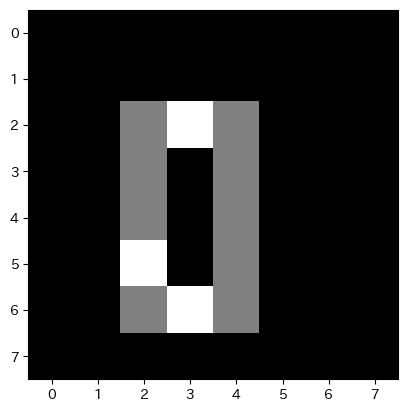

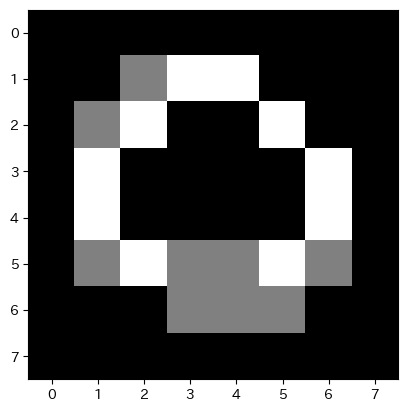

In [ ]:
# 以下は確認

import pandas as pd
df = pd.read_csv("out.csv")
print(df)
df_x =df.to_numpy()
for i in range(0,len(df_x)):
    plt.imshow(df_x[i].reshape(8,8),cmap="gray")
    plt.show()